In [1]:
# retrieve sequences and species as label
from Bio import SeqIO

infile = 'mature.fa'
# infile = 'hairpin.fa'

def iterate_data(infile:str):
    with open(infile, 'r') as f:
        parser = SeqIO.parse(f, 'fasta')
        for rec in parser:
            seq = str(rec.seq)
            specie = ' '.join(rec.description.split(' ')[2:4])
            yield seq, specie

data_iter = iterate_data(infile)
seq, specie = next(data_iter)
print(seq, specie)

UGAGGUAGUAGGUUGUAUAGUU Caenorhabditis elegans


In [3]:
# length of input seq
seq_len, species, n = {}, {}, 0
for seq, specie in iterate_data(infile):
    n += 1
    #     count length
    _len = len(seq)
    if _len not in seq_len:
        seq_len[_len] = 0
    seq_len[_len] += 1
    
    # 
    if specie not in species:
        species[specie] = 0
    species[specie] += 1
print(f"Number of miRNAs: {n}")

Number of miRNAs: 48885


In [10]:
list(seq_len)

[22, 21, 23, 25, 24, 20, 26, 19, 17, 18, 27, 28, 29, 16, 33, 34, 32, 15, 30]

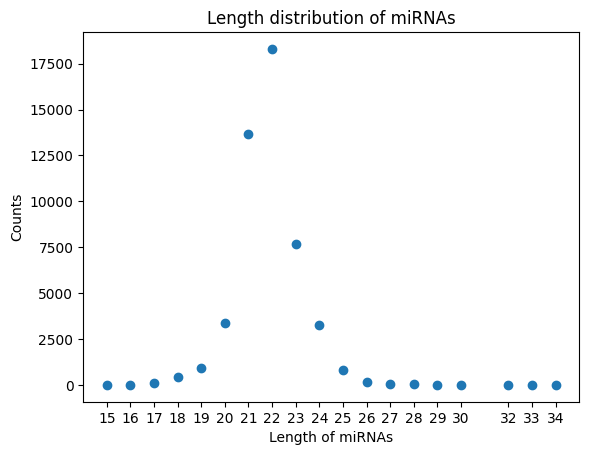

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.scatter(list(seq_len), seq_len.values())
plt.title('Length distribution of miRNAs')
plt.xlabel('Length of miRNAs')
plt.ylabel('Number of miRNAs')
plt.xlim([14,35])
plt.xticks(list(seq_len))
plt.show()

In [18]:
print(seq_len)
embedding_dim = max(seq_len) + 1
print('Embedding dim (feature size) = ', embedding_dim)

{22: 18301, 21: 13652, 23: 7694, 25: 819, 24: 3238, 20: 3374, 26: 177, 19: 941, 17: 113, 18: 430, 27: 70, 28: 33, 29: 18, 16: 16, 33: 1, 34: 1, 32: 1, 15: 3, 30: 3}
Embedding dim (feature size) =  35


Homo sapiens 2656
Mus musculus 1978
Gallus gallus 1235
Monodelphis domestica 1138
Bos taurus 1030
Macaca mulatta 912
Rattus norvegicus 764
Medicago truncatula 756
Glycine max 756
Oryza sativa 738
Oreochromis niloticus 695


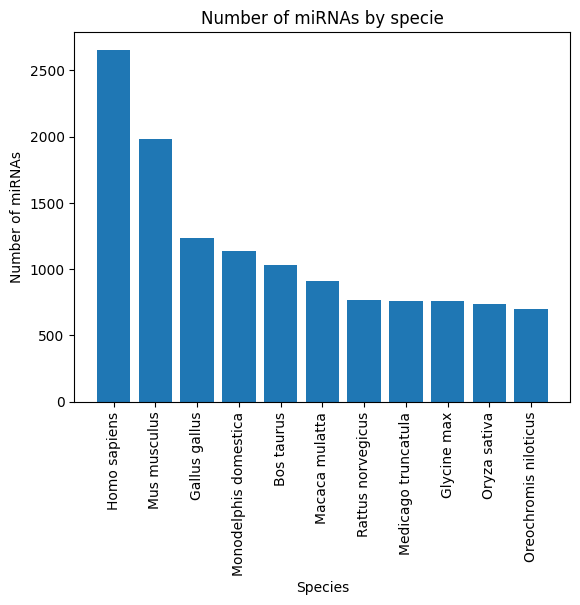

In [19]:
# print(species)
ordered_species = sorted(species.items(), key=lambda x: x[1], reverse=True)
names, values = [], []
n = 0
top_species= []
for k,v in ordered_species:
    print(k,v)
    if len(top_species)<=3:
        top_species.append(k)
    names.append(k)
    values.append(v)
    n += 1
    if n > 10:
        break
y_pos = range(len(values))
plt.bar(y_pos, values)
plt.title('Number of miRNAs by specie')
plt.ylabel('Number of miRNAs')
plt.xticks(y_pos, names, rotation=90)
plt.show()